In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('StudentsPerformance_modified.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72.0,74.0
1,female,group C,some college,standard,completed,69,90.0,88.0
2,female,group B,master's degree,standard,none,90,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47,57.0,44.0
4,male,group C,some college,standard,none,76,78.0,75.0


In [3]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     8
reading score                  6
writing score                  9
dtype: int64

In [4]:
df.dtypes

gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                      object
reading score                  float64
writing score                  float64
dtype: object

In [5]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     8
reading score                  6
writing score                  9
dtype: int64

In [6]:
df['math score'].replace('?', 0.0, inplace= True)

In [7]:
df.dtypes

gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                      object
reading score                  float64
writing score                  float64
dtype: object

In [8]:
df['math score'].isna().sum()

8

In [9]:
df['math score'] = df['math score'].map(lambda x: float(x))

In [10]:
df.dtypes

gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                     float64
reading score                  float64
writing score                  float64
dtype: object

In [11]:
df['math score'].fillna(df['math score'].mean(), inplace= True)

In [12]:
df.fillna(df.mean(), inplace= True)

/var/folders/4s/ggwq0c015gn9k_rgl_330q7m0000gn/T/ipykernel_10698/4138100293.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace= True)


In [13]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [14]:
# df.boxplot()

In [19]:
def remove_outliers(feature):
    global df
    q3,q1 = np.percentile(df[feature], [75, 25])
    
    iqr = q3-q1
    lower = q1-(1.5*iqr)
    upper = q3+(1.5*iqr)
    
    df = df[(df[feature] >= lower)&(df[feature]<= upper)]
    
remove_outliers('math score')
remove_outliers('reading score')
remove_outliers('writing score')

In [16]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74.0
1,female,group C,some college,standard,completed,69.0,90.0,88.0
2,female,group B,master's degree,standard,none,90.0,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47.0,57.0,44.0
4,male,group C,some college,standard,none,76.0,78.0,75.0
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88.0,99.0,95.0
996,male,group C,high school,free/reduced,none,62.0,55.0,55.0
997,female,group C,high school,free/reduced,completed,59.0,71.0,65.0
998,female,group D,some college,standard,completed,68.0,78.0,77.0


<Axes: >

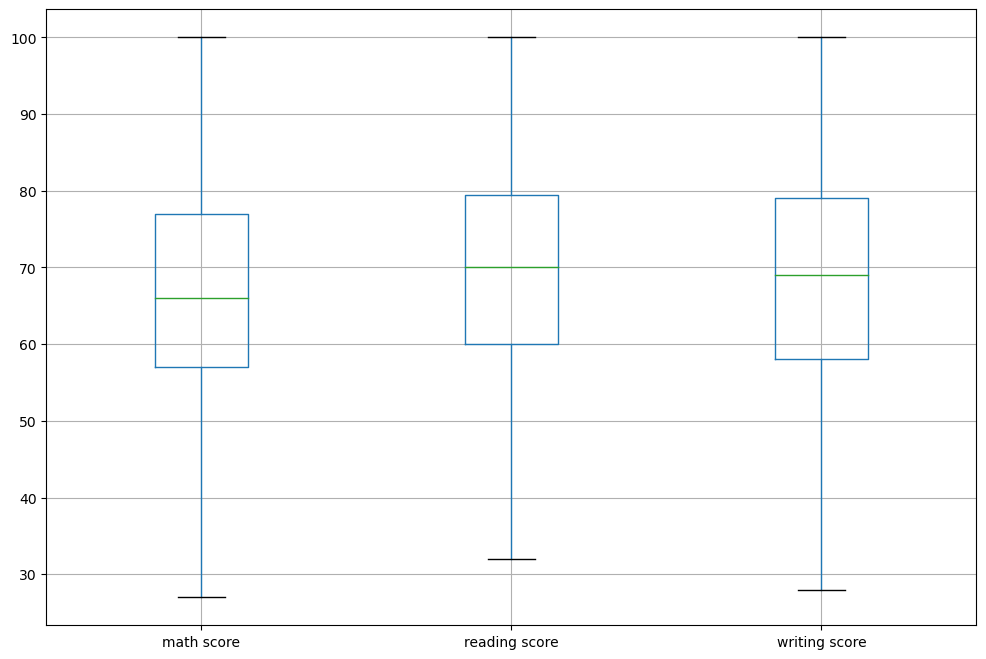

In [20]:
plt.figure(figsize=(12,8))
df.boxplot()

<Axes: xlabel='math score', ylabel='Count'>

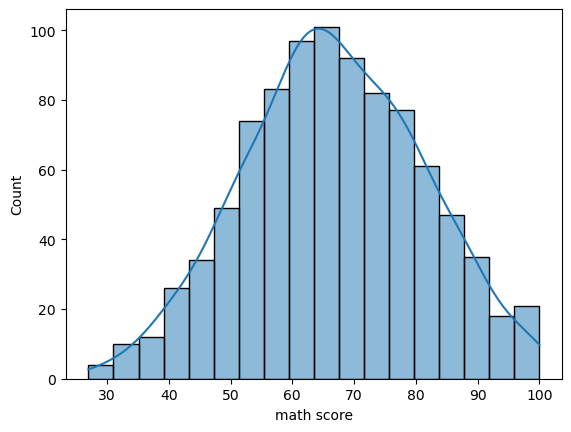

In [22]:
sns.histplot(df['math score'], kde= True)

<Axes: ylabel='Density'>

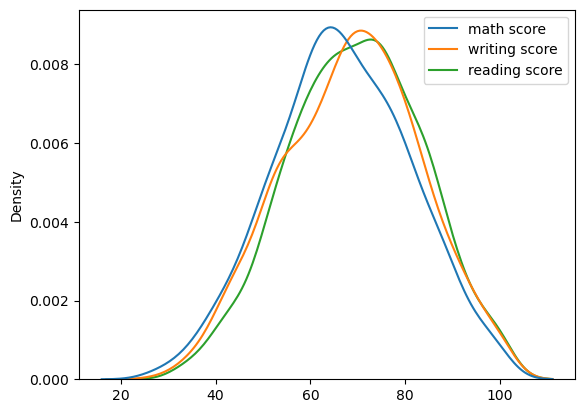

In [29]:
sns.kdeplot(df[['math score', 'writing score', 'reading score']])

In [27]:
from scipy.stats import skew
skewness = skew(df['writing score'].values)

In [28]:
skewness

-0.08851130411499121

In [ ]:
from sklearn.preprocessing import PowerTransformer
transformer = PowerTransformer(method='yeo-johnson')
transformed_data = transformer.fit_transform(feature_data.reshape(-1, 1))
